In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
real = "C:\\Users\\Admin\\Desktop\\Project_File\\Dataset\\real_and_fake_face\\training_real\\"
fake = "C:\\Users\\Admin\\Desktop\\Project_File\\Dataset\\real_and_fake_face\\training_fake\\"
datadir = "C:\\Users\\Admin\\Desktop\\Project_File\\Dataset\\real_and_fake_face\\"


real_path = os.listdir(real)
fake_path = os.listdir(fake)

# Let's take a closer look

In [4]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
    return image[...,::-1]

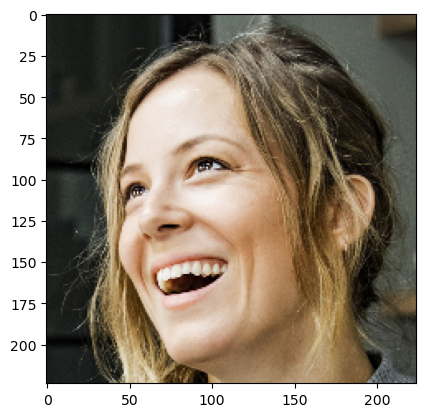

In [5]:
plt.imshow(load_img(real + real_path[2]), cmap='gray')

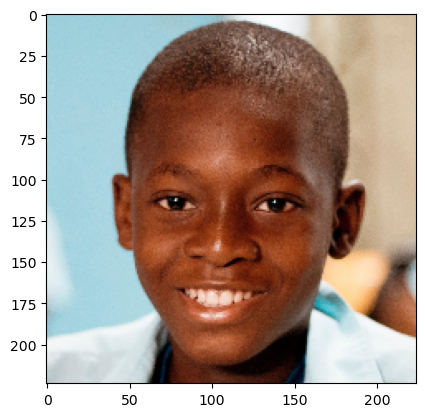

In [6]:
plt.imshow(load_img(real + real_path[12]), cmap='gray')

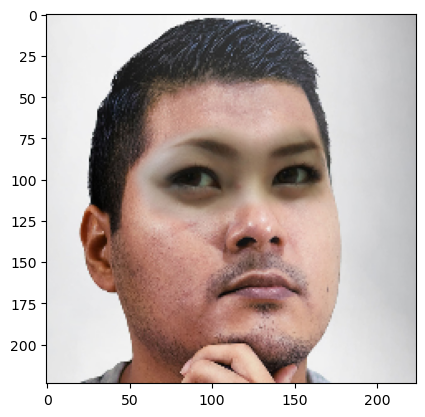

In [7]:
plt.imshow(load_img(fake + fake_path[128]), cmap='gray')

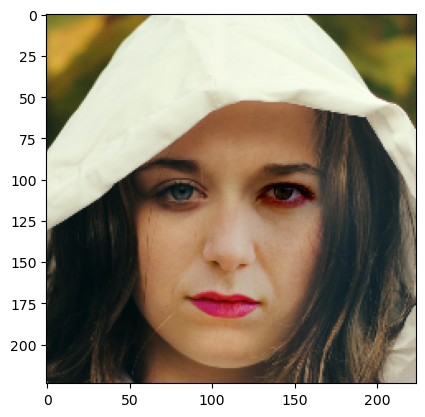

In [8]:
plt.imshow(load_img(fake + fake_path[80]), cmap='gray')

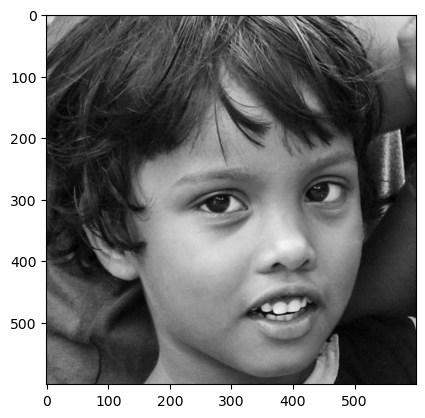

training_real


In [9]:
# datadir = "dataset"
categories = ["training_real" , "training_fake"]

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
       
        plt.show()
        print(category)
        break
    break

# Creating Training Data

In [10]:
training_data = []
IMG_SIZE = 224

categories = ["training_real" , "training_fake"]

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                pass
create_training_data()

In [11]:
training_data = np.array(training_data)
print(training_data.shape)

(2041, 2)


C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\4048587886.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training_data = np.array(training_data)


In [12]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [13]:
print(X.shape)
print(y.shape)

(2041, 224, 224, 3)
(2041,)


In [14]:
# Normalization 
X = X/255.0 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=316)

In [16]:
print("Shape of train_x: ",X_train.shape)
print("Shape of train_y: ",y_train.shape)
print("Shape of test_x: ",X_test.shape)
print("Shape of test_y: ",y_test.shape)

Shape of train_x:  (1632, 224, 224, 3)
Shape of train_y:  (1632,)
Shape of test_x:  (409, 224, 224, 3)
Shape of test_y:  (409,)


In [17]:
print(y_test[1:10])

[1 1 0 0 0 0 1 1 0]


In [18]:
print(np.unique(y_train, return_counts = True))
print(np.unique(y_test, return_counts = True))

(array([0, 1]), array([858, 774], dtype=int64))
(array([0, 1]), array([223, 186], dtype=int64))


In [19]:
pip install --upgrade tensorflow

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

train_x = tf.keras.utils.normalize(X_train,axis=1)
test_x = tf.keras.utils.normalize(X_test, axis=1)

In [21]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64,(3,3),padding='same',activation = 'relu',
                            input_shape= X.shape[1:]),
            tf.keras.layers.Conv2D(48,(3,3),activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(24,(3,3),activation = 'relu'),
            tf.keras.layers.Conv2D(48,(3,3),activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')

])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 48)      27696     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 48)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 24)      10392     
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 48)      10416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 48)       0         
 2D)                                                    

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
hist = model.fit(X_train,y_train, batch_size=32, epochs = 5, validation_split=0.2)

Epoch 1/5
41/41 [==============================] - 1504s 36s/step - loss: 0.7153 - accuracy: 0.5180 - val_loss: 0.6885 - val_accuracy: 0.5352
Epoch 2/5
41/41 [==============================] - 845s 21s/step - loss: 0.6874 - accuracy: 0.5234 - val_loss: 0.6782 - val_accuracy: 0.5443
Epoch 3/5
41/41 [==============================] - 829s 20s/step - loss: 0.6849 - accuracy: 0.5594 - val_loss: 0.7021 - val_accuracy: 0.5382
Epoch 4/5
41/41 [==============================] - 20432s 510s/step - loss: 0.6737 - accuracy: 0.5969 - val_loss: 0.7072 - val_accuracy: 0.5352
Epoch 5/5
41/41 [==============================] - 1598s 39s/step - loss: 0.6119 - accuracy: 0.6544 - val_loss: 0.6631 - val_accuracy: 0.5872


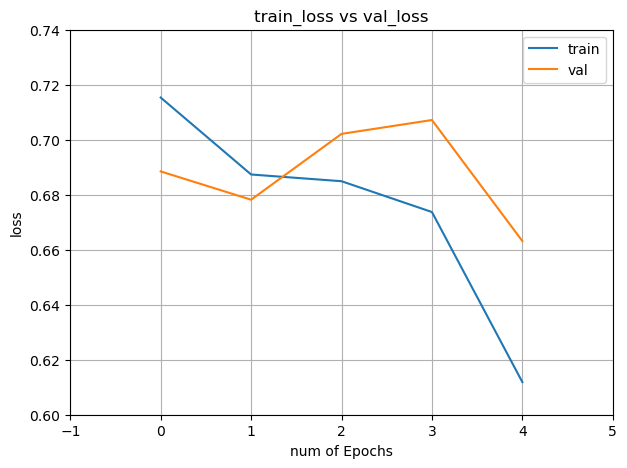

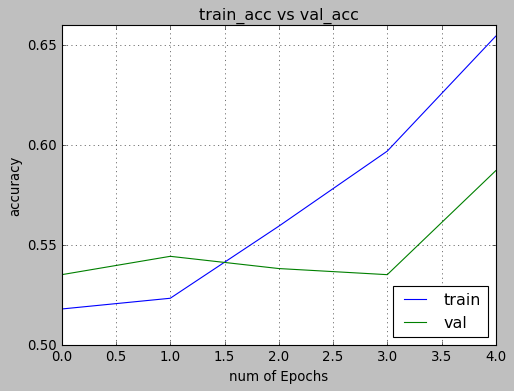

In [25]:
epochs = 5
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])

plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)

plt.style.use(['classic'])

In [26]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

13/13 [==============================] - 129s 10s/step - loss: 0.6924 - accuracy: 0.5526
0.6924363374710083
0.5525672435760498


In [27]:
predictions = model.predict(X_test)
# predictions

13/13 [==============================] - 124s 10s/step


In [28]:
for i in predictions[:10]:
    print(i)

[0.38483763]
[0.25713563]
[0.43241718]
[0.34735566]
[0.5418215]
[0.53633416]
[0.45810723]
[0.2192913]
[0.29046533]
[0.35651132]


In [29]:
rounded_predictions = model.predict(X_test)
rounded_pred = []
for i in rounded_predictions:
    rounded_pred.append(round(int(i)))

13/13 [==============================] - 68s 5s/step


In [30]:
for i in rounded_pred[400:409] :
    print(i)

0
0
0
0
0
0
0
0
0


# VGG 16

In [31]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import batch_normalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [32]:
vgg16_model = keras.applications.vgg16.VGG16()

In [33]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [34]:
type(vgg16_model)
## This is not a sequential model.

keras.engine.functional.Functional

In [35]:
from keras.models import Sequential

model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
    
# Now, we have replicated the entire vgg16_model
# (excluding the output layer) to a new Sequential model, which we've just given the name model

In [36]:
for layer in model.layers:
    layer.trainable = False
    
# Next, we’ll iterate over each of the layers in our new Sequential model and set them to
# be non-trainable. This freezes the weights and other trainable parameters 
# in each layer so that they will not be updated when we pass in our images of fake and real faces.

In [37]:
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

# Model is Ready, time to Compile it

In [39]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
hist = model.fit(X_train,y_train, batch_size=32, epochs = 10, validation_split=0.2)

Epoch 1/5
41/41 [==============================] - 2909s 72s/step - loss: 0.7874 - accuracy: 0.5180 - val_loss: 0.6885 - val_accuracy: 0.5505
Epoch 2/5
41/41 [==============================] - 2272s 56s/step - loss: 0.6798 - accuracy: 0.5663 - val_loss: 0.6942 - val_accuracy: 0.5229
Epoch 3/5
41/41 [==============================] - 3469s 86s/step - loss: 0.6698 - accuracy: 0.5870 - val_loss: 0.6826 - val_accuracy: 0.5627
Epoch 4/5
41/41 [==============================] - 2379s 58s/step - loss: 0.6679 - accuracy: 0.6000 - val_loss: 0.6773 - val_accuracy: 0.5963
Epoch 5/5
41/41 [==============================] - 8205s 103s/step - loss: 0.6572 - accuracy: 0.6015 - val_loss: 0.6748 - val_accuracy: 0.6086


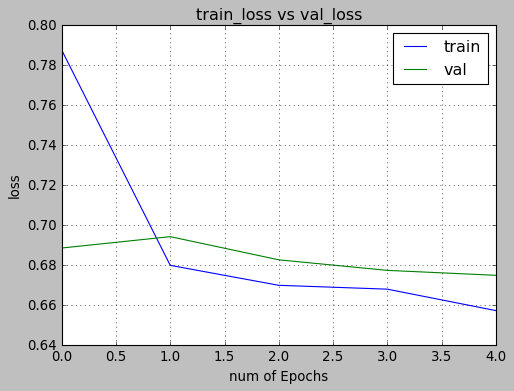

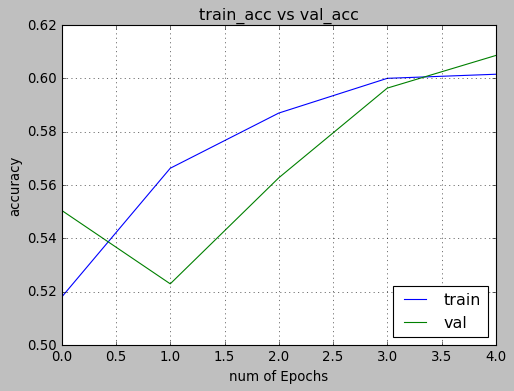

In [41]:
epochs = 5
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [42]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

13/13 [==============================] - 644s 50s/step - loss: 0.6608 - accuracy: 0.6015
0.6607670783996582
0.6014670133590698


In [43]:
predictions = model.predict(X_test)
# predictions

13/13 [==============================] - 654s 50s/step


In [44]:
for i in predictions[:10]:
    print(i)

[0.30553517]
[0.51152295]
[0.53133476]
[0.48737302]
[0.7053539]
[0.43269312]
[0.36215022]
[0.4246584]
[0.42913595]
[0.24374537]


In [45]:
rounded_predictions = model.predict(X_test)
rounded_pred = []
for i in rounded_predictions:
    rounded_pred.append(round(int(i)))

13/13 [==============================] - 667s 51s/step


In [46]:
print(y_test[1:10])
print(np.unique(y_test, return_counts = True))

[1 1 0 0 0 0 1 1 0]
(array([0, 1]), array([223, 186], dtype=int64))


In [47]:
rounded_prediction = np.array(rounded_pred)
print(np.unique(rounded_pred, return_counts = True))

(array([0]), array([409], dtype=int64))


In [48]:
## Just Run this once and you can change the number of the images mentioned for prediction and model result.

## For Image Display.
def load_img(path):
    image = cv2.resize(path, (224, 224))
    return image[...,::-1]

## For Predicting result.
def prepare(image):
    IMG_SIZE = 224
    new_array = cv2.resize(image, (IMG_SIZE, IMG_SIZE)) 
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,3)

1/1 [==============================] - 2s 2s/step
Actual:  Real-Face
Prediction:  Real-Face


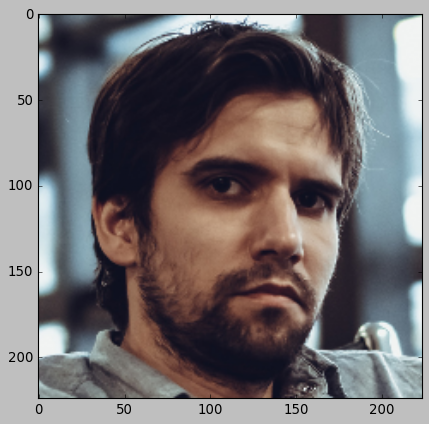

In [49]:
## Change the value of n for other images. I have chosen these images randomly.

n = 15

prediction = model.predict(prepare(X_test[n]))


x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_pred = model.predict(x = prepare(X_test[n]), batch_size=10, verbose=0)
y = ["Real-Face" if rounded_prediction[0]== 0 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

1/1 [==============================] - 2s 2s/step
Actual:  Fake-Face
Prediction:  Fake-Face


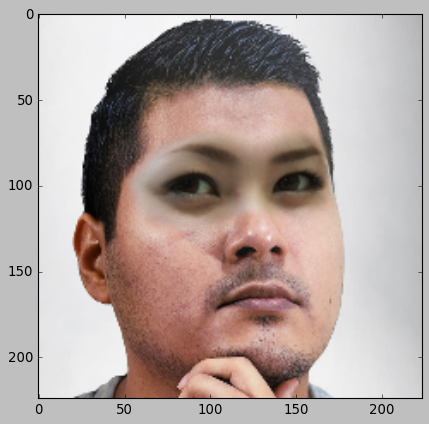

In [50]:
n = 250

prediction = model.predict(prepare(X_test[n]))

x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_pred = model.predict(x = prepare(X_test[n]), batch_size=10, verbose=0)
y = ["Real-Face" if rounded_pred[0]== 0 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

# Deployment 

In [95]:
tf.keras.models.save_model(model,'my_model2.hdf5')

In [56]:
!pip install streamlit

     ---------------------------------------- 9.6/9.6 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 164.8/164.8 kB 5.0 MB/s eta 0:00:00
     ------------------------------------ 184.3/184.3 kB 654.5 kB/s eta 0:00:00
     ---------------------------------------- 20.6/20.6 MB 1.7 MB/s eta 0:00:00
     ------------------------------------ 813.6/813.6 kB 755.8 kB/s eta 0:00:00
     ------------------------------------ 238.7/238.7 kB 585.7 kB/s eta 0:00:00
     -------------------------------------- 62.7/62.7 kB 673.0 kB/s eta 0:00:00
     -------------------------------------- 84.5/84.5 kB 394.8 kB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 1.5 MB/s eta 0:00:00
     ------------------------------------ 340.1/340.1 kB 604.2 kB/s eta 0:00:00
  Created wheel for vali

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [96]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  datadir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2041 files belonging to 2 classes.
Using 1633 files for training.


In [97]:
class_names = train_ds.class_names
print(class_names)

['training_fake', 'training_real']


In [99]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model("C:\\Users\\Admin\\Downloads\\my_model2.hdf5")
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Fake Image Detection
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (224,224)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.sigmoid(predictions[0])
    st.write(predictions)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)



Overwriting app.py


run on local terminal : 
streamlit run app.py